# Лабораторная работа №2

# Графики

Начальная предобработка

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Загрузка данных
df = pd.read_csv('train.csv')

# Предобработка: удаление дубликатов и заполнение пропусков
df = df.drop_duplicates()
df['CreditScore'] = df['CreditScore'].fillna(df['CreditScore'].median())
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].median())

# Преобразование LoanApproved в категориальный тип
df['LoanApproved'] = df['LoanApproved'].astype('category')

Построю графики зависимости части признаков от целевой переменной `LoanApproved`.

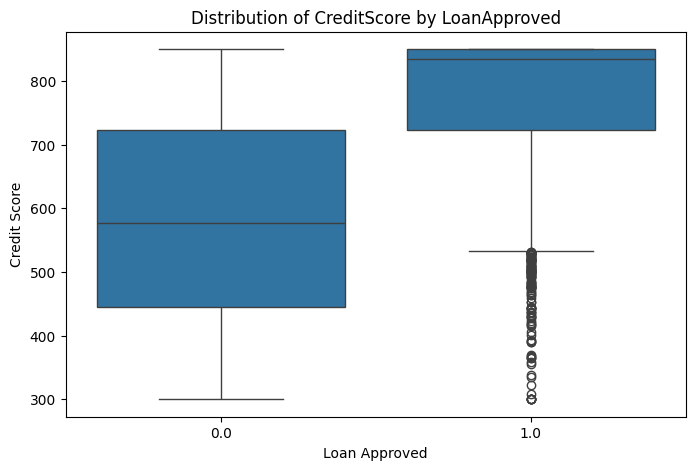

In [19]:
# Boxplot для CreditScore
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='LoanApproved', y='CreditScore')
plt.title('Distribution of CreditScore by LoanApproved')
plt.xlabel('Loan Approved')
plt.ylabel('Credit Score')
plt.show()

Заемщики с одобренными заявками (LoanApproved=1) имеют более высокие значения CreditScore по сравнению с теми, кому отказали (LoanApproved=0).

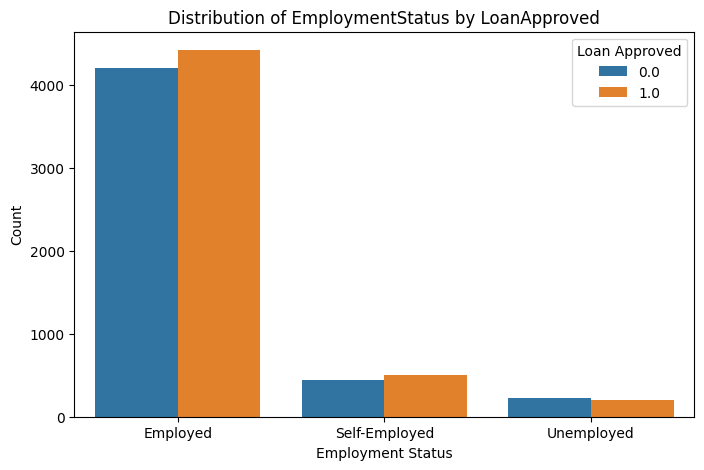

In [20]:
# Barplot для EmploymentStatus
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='EmploymentStatus', hue='LoanApproved')
plt.title('Distribution of EmploymentStatus by LoanApproved')
plt.xlabel('Employment Status')
plt.ylabel('Count')
plt.legend(title='Loan Approved')
plt.show()

Занятые люди (EmploymentStatus определенных категорий) чаще получают одобрение, что подчеркивает важность стабильного дохода для кредиторов, однако разница не столь велика и в целом видно, что в кредите охотно отказывают занятым в том числе.

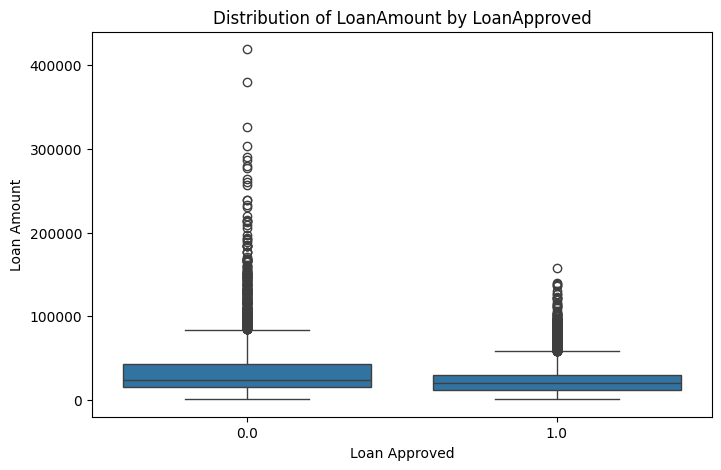

In [21]:
#Boxplot для LoanAmount
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='LoanApproved', y='LoanAmount')
plt.title('Distribution of LoanAmount by LoanApproved')
plt.xlabel('Loan Approved')
plt.ylabel('Loan Amount')
plt.show()

Заемщики с одобренными заявками в среднем запрашивают меньшие суммы кредитов по сравнению с теми, кому отказано. Это указывает на то, что большие суммы могут быть связаны с повышенным риском.

# Предобработка

In [73]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Загрузка данных
df = pd.read_csv('train.csv')

# Удаление дубликатов
df = df.drop_duplicates()

# Удаление строк с пропущенными значениями
df = df.dropna()

# Фильтрация некорректных значений RiskScore
df = df[(df['RiskScore'] >= 0) & (df['RiskScore'] <= 100)]

# Преобразование ApplicationDate в числовой формат
df['ApplicationDate'] = pd.to_datetime(df['ApplicationDate'])
df['ApplicationDate'] = df['ApplicationDate'].astype(int) / 10**9

# Кодирование категориальных переменных с использованием целевого кодирования
target_col = 'LoanApproved'
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    if col in df.columns:
        target_mean = df.groupby(col)[target_col].mean()
        df[col] = df[col].map(target_mean)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9332 entries, 0 to 9999
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             9332 non-null   float64
 1   Age                         9332 non-null   float64
 2   AnnualIncome                9332 non-null   float64
 3   CreditScore                 9332 non-null   float64
 4   LoanAmount                  9332 non-null   float64
 5   LoanDuration                9332 non-null   float64
 6   MaritalStatus               9332 non-null   float64
 7   NumberOfDependents          9332 non-null   float64
 8   HomeOwnershipStatus         9332 non-null   float64
 9   MonthlyDebtPayments         9332 non-null   float64
 10  CreditCardUtilizationRate   9332 non-null   float64
 11  NumberOfOpenCreditLines     9332 non-null   float64
 12  NumberOfCreditInquiries     9332 non-null   float64
 13  DebtToIncomeRatio           9332 non-n

# Бинарная классификация

Свой класс для линейного классификатора и логистической регрессии с методами `fit` и `predict`

In [74]:
class CustomLinearModel:
    def __init__(self, model_type='logistic', learning_rate=0.01, epochs=1000):
        """
        Инициализация модели.
        :param model_type: 'linear' для линейной регрессии или 'logistic' для логистической регрессии.
        :param learning_rate: Скорость обучения.
        :param epochs: Количество итераций.
        """
        self.model_type = model_type
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = 0

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        """
        Обучение модели.
        :param X: Входные признаки (матрица).
        :param y: Целевая переменная.
        """
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)

        for _ in range(self.epochs):
            linear_model = np.dot(X, self.weights) + self.bias
            if self.model_type == 'logistic':
                predictions = self.sigmoid(linear_model)
            else:
                predictions = linear_model

            # Градиенты
            errors = predictions - y
            dw = np.dot(X.T, errors) / n_samples
            db = np.sum(errors) / n_samples

            # Обновление параметров
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        """
        Предсказание.
        :param X: Входные признаки (матрица).
        :return: Предсказания.
        """
        linear_model = np.dot(X, self.weights) + self.bias
        if self.model_type == 'logistic':
            predictions = self.sigmoid(linear_model)
            return np.where(predictions >= 0.5, 1, 0)
        return linear_model

Решаем задачу бинарной классификации с помощью готовых реализаций, в том числе реализации выше.

Доп. реализация : Наивный байесовский классификатор

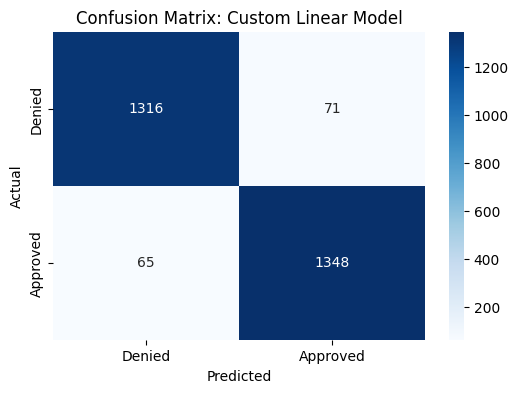

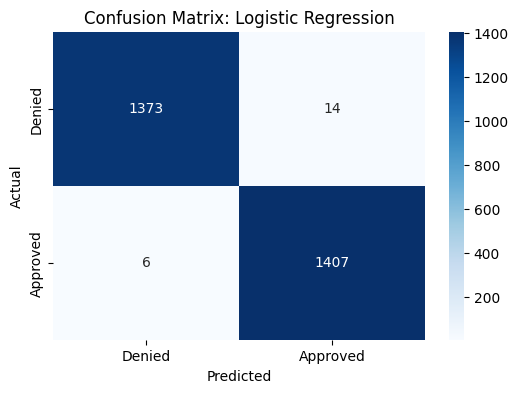

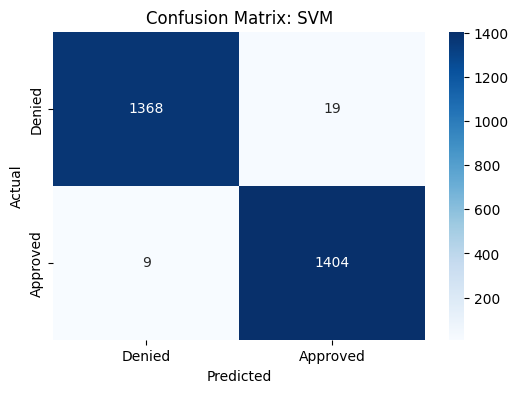

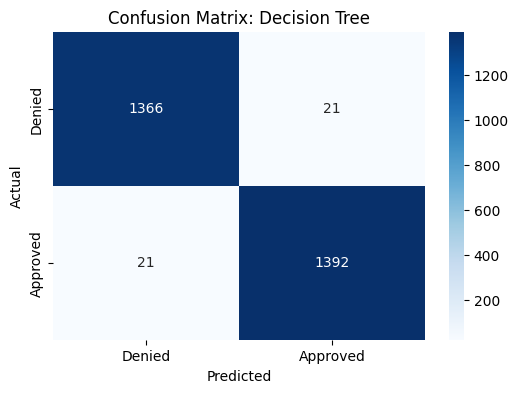

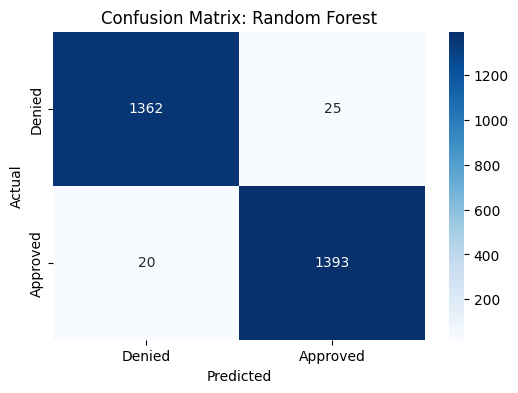

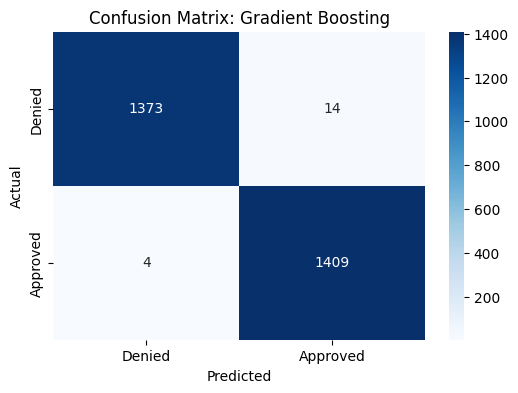

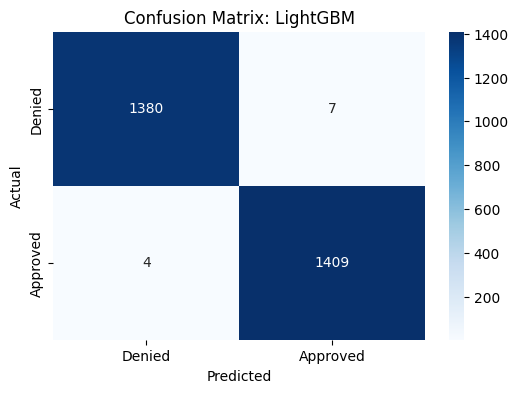

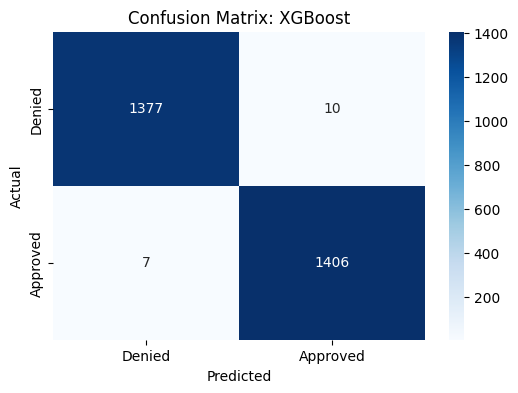

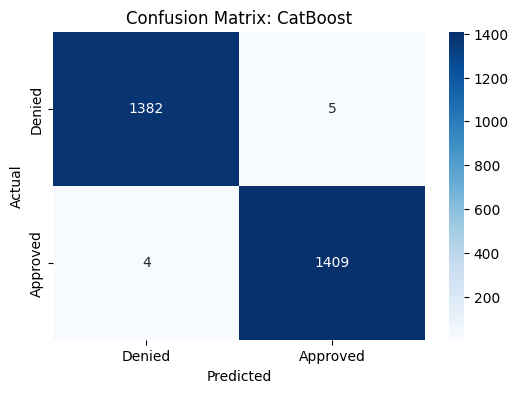

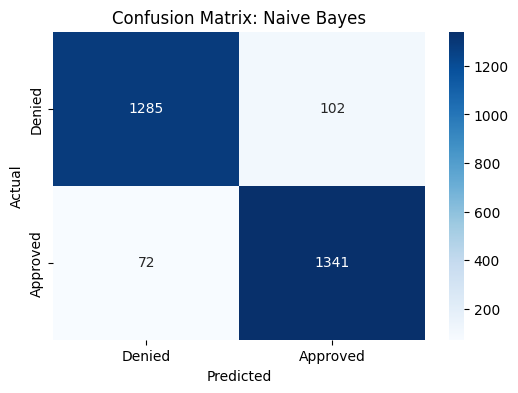

                     Precision    Recall  F1-Score  Accuracy
Custom Linear Model   0.949965  0.953999  0.951977  0.951429
Logistic Regression   0.990148  0.995754  0.992943  0.992857
SVM                   0.986648  0.993631  0.990127  0.990000
Decision Tree         0.985138  0.985138  0.985138  0.985000
Random Forest         0.982370  0.985846  0.984105  0.983929
Gradient Boosting     0.990162  0.997169  0.993653  0.993571
LightGBM              0.995056  0.997169  0.996112  0.996071
XGBoost               0.992938  0.995046  0.993991  0.993929
CatBoost              0.996464  0.997169  0.996816  0.996786
Naive Bayes           0.929314  0.949045  0.939076  0.937857


In [76]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
import lightgbm as lgb
import xgboost as xgb
from catboost import CatBoostClassifier
import warnings

warnings.filterwarnings("ignore", category=UserWarning, module="lightgbm")

# Split data
X = df.drop(columns=['LoanApproved'])
y = df['LoanApproved']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply StandardScaler for sensitive models
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Models
models = {
    'Custom Linear Model': CustomLinearModel(model_type='logistic', learning_rate=0.01, epochs=1000),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'SVM': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'LightGBM': lgb.LGBMClassifier(verbose=-1),
    'XGBoost': xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'CatBoost': CatBoostClassifier(verbose=0),
    'Naive Bayes': GaussianNB()
}

# Metrics
metrics = {}

for name, model in models.items():
    if name == 'Custom Linear Model':
        model.fit(X_train, y_train.values)
        y_pred = model.predict(X_test)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    metrics[name] = [precision, recall, f1, accuracy]

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Denied', 'Approved'], yticklabels=['Denied', 'Approved'])
    plt.title(f'Confusion Matrix: {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Metrics DataFrame
metrics_df = pd.DataFrame(metrics, index=['Precision', 'Recall', 'F1-Score', 'Accuracy']).T
print(metrics_df)

# Вывод

 Метрика F1-Score является наиболее информативной, так как она учитывает баланс между точностью (Precision) и полнотой (Recall), что особенно важно в задачах, связанных с оценкой риска.

Результаты классификации подтверждают, что данные были хорошо подготовлены и сбалансированы, что позволило практически всем моделям продемонстрировать высокие значения метрик. LightGBM и CatBoost достигли наивысших значений F1-меры (около 0.996) и точности (более 99.6%). Эти модели минимизировали ошибки для обоих классов (хорошо видно на матрицах ошибок). XGBoost немного уступает лидерам, но также показал достойные результаты. Простая линейная модель (Custom Linear Model) продемонстрировала конкурентоспособную производительность с F1-мерой 0.951, что подтверждает её эффективность при правильной реализации. Naive Bayes оказался наименее успешной моделью, допустив больше ошибок из-за ограничений в предположениях о независимости признаков.
Таким образом, градиентный бустинг подтвердил свою способность эффективно работать с большим набором признаков и выявлять сложные нелинейные зависимости.